In [275]:
from matplotlib import pyplot as plt
from matplotlib import cm
from IPython.display import display
import numpy as np
from PIL import Image
import mapper
import graphviz
from glob import glob

%matplotlib inline

In [78]:

# plt.imshow(flipped)

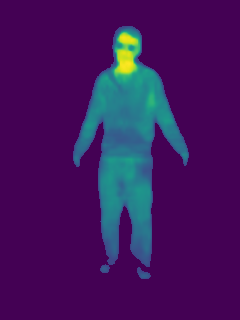

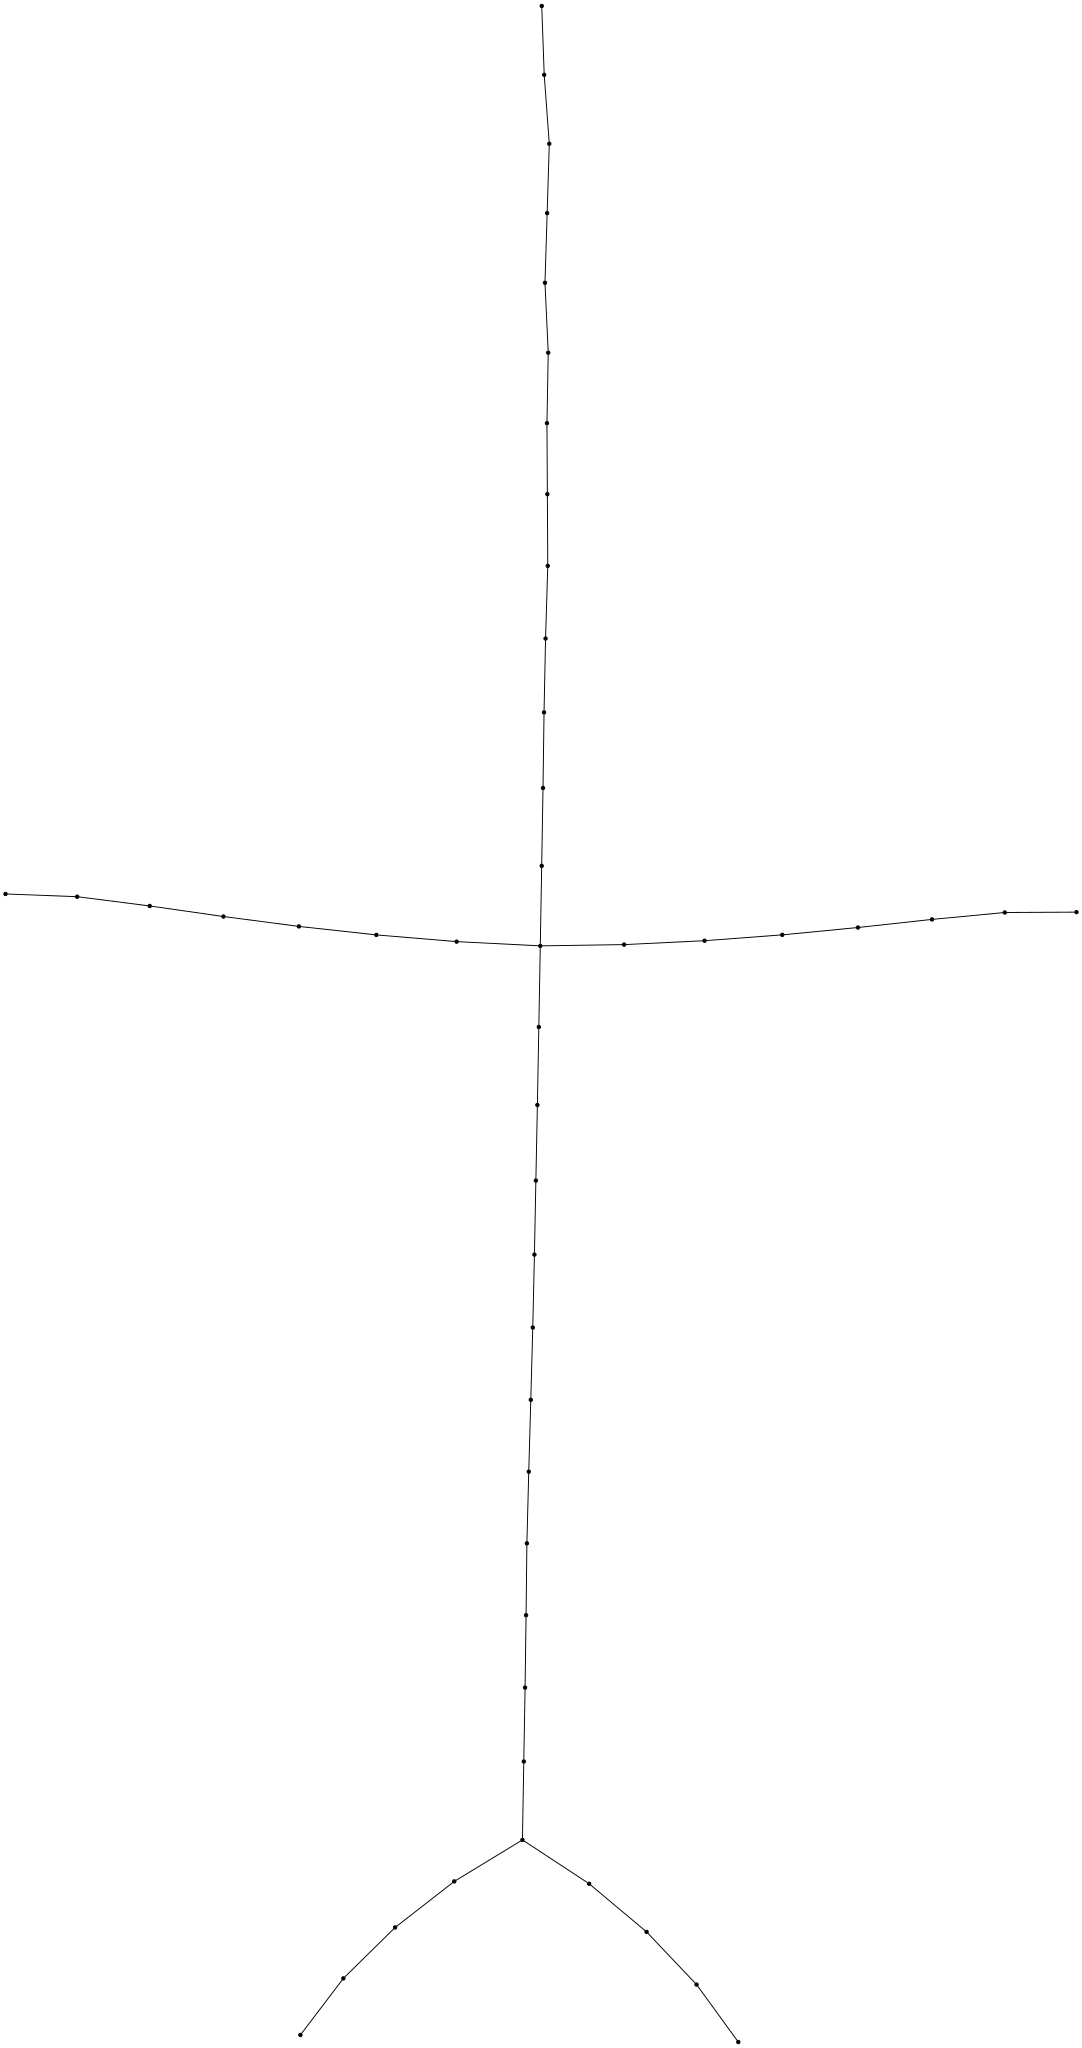

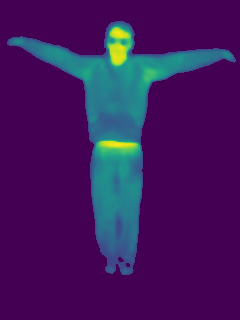

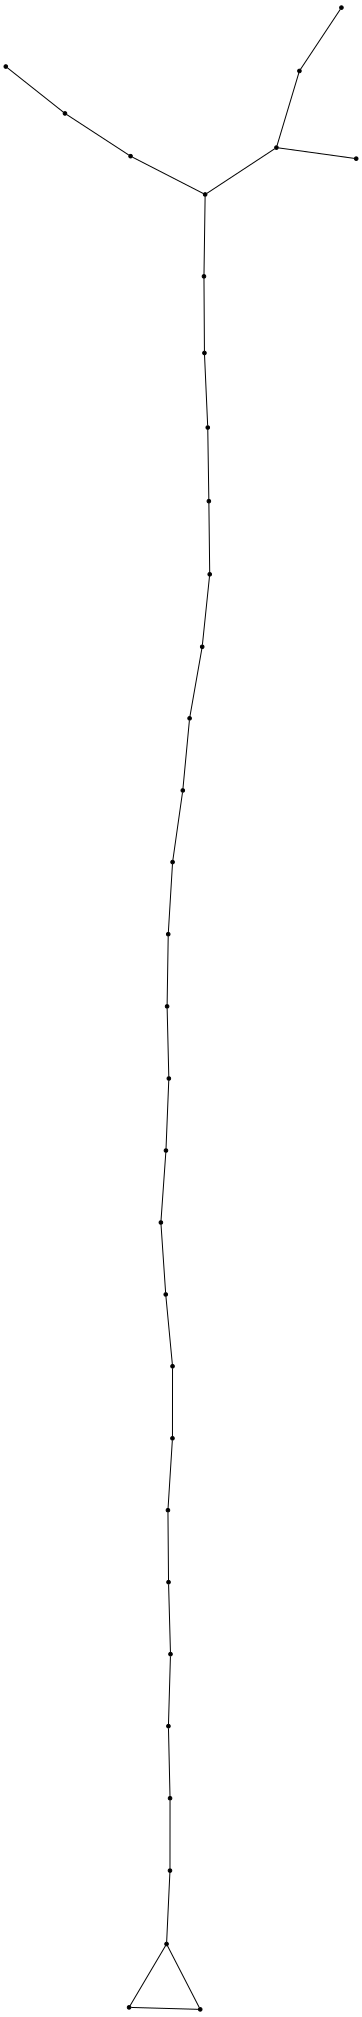

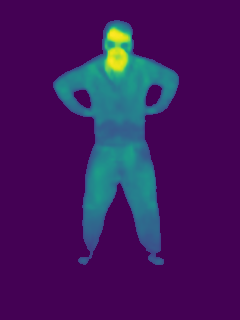

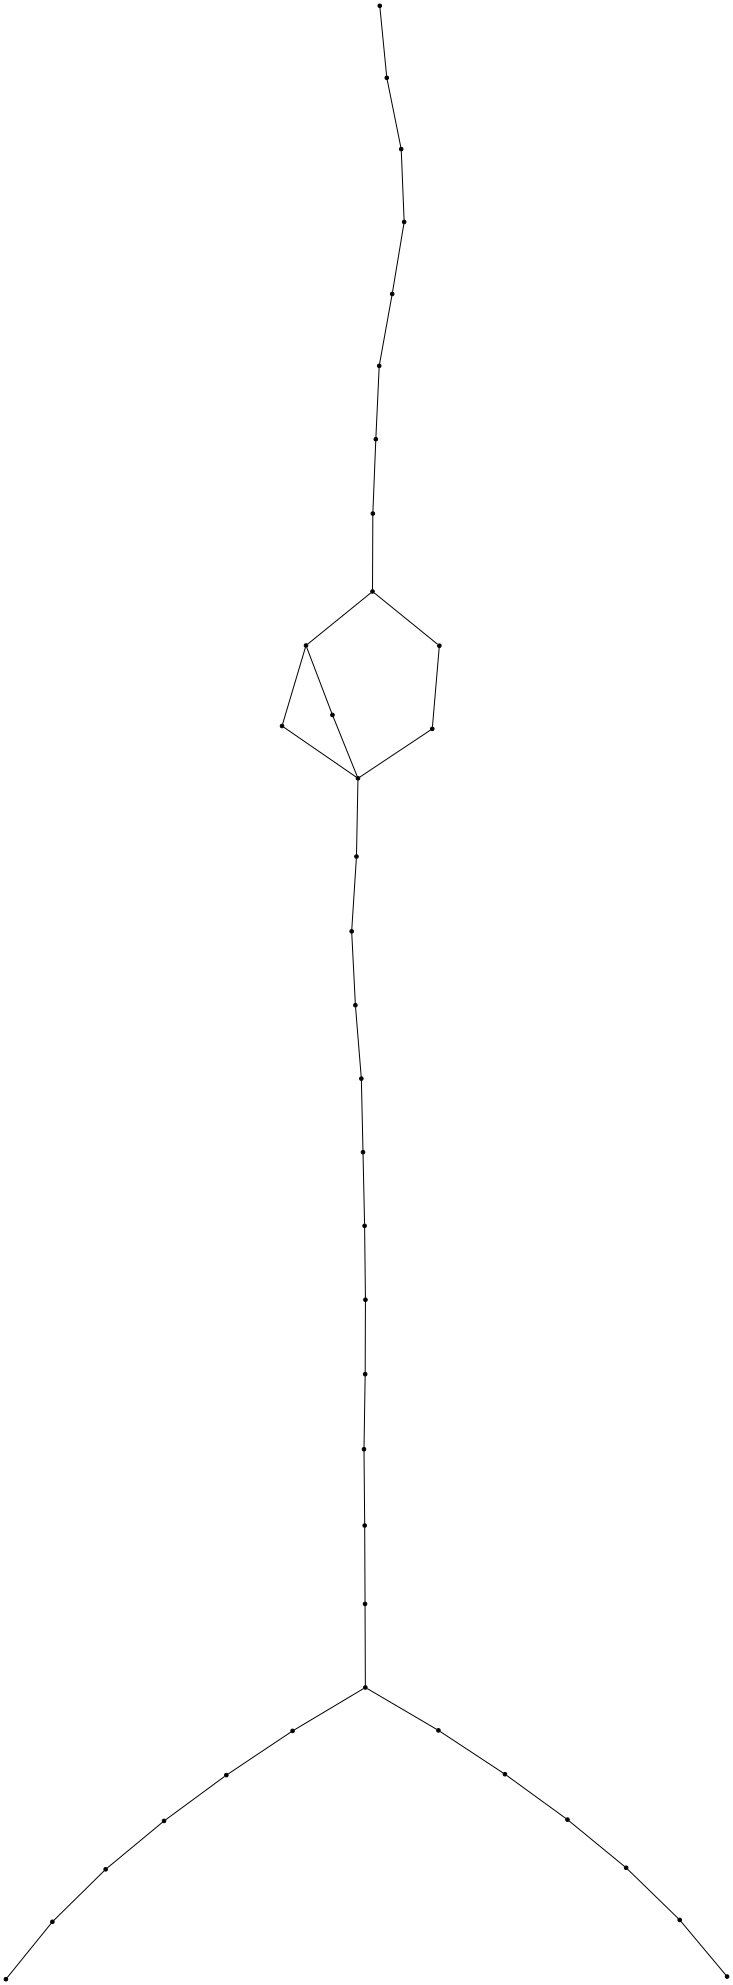

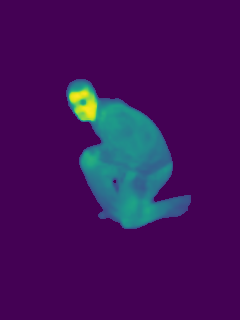

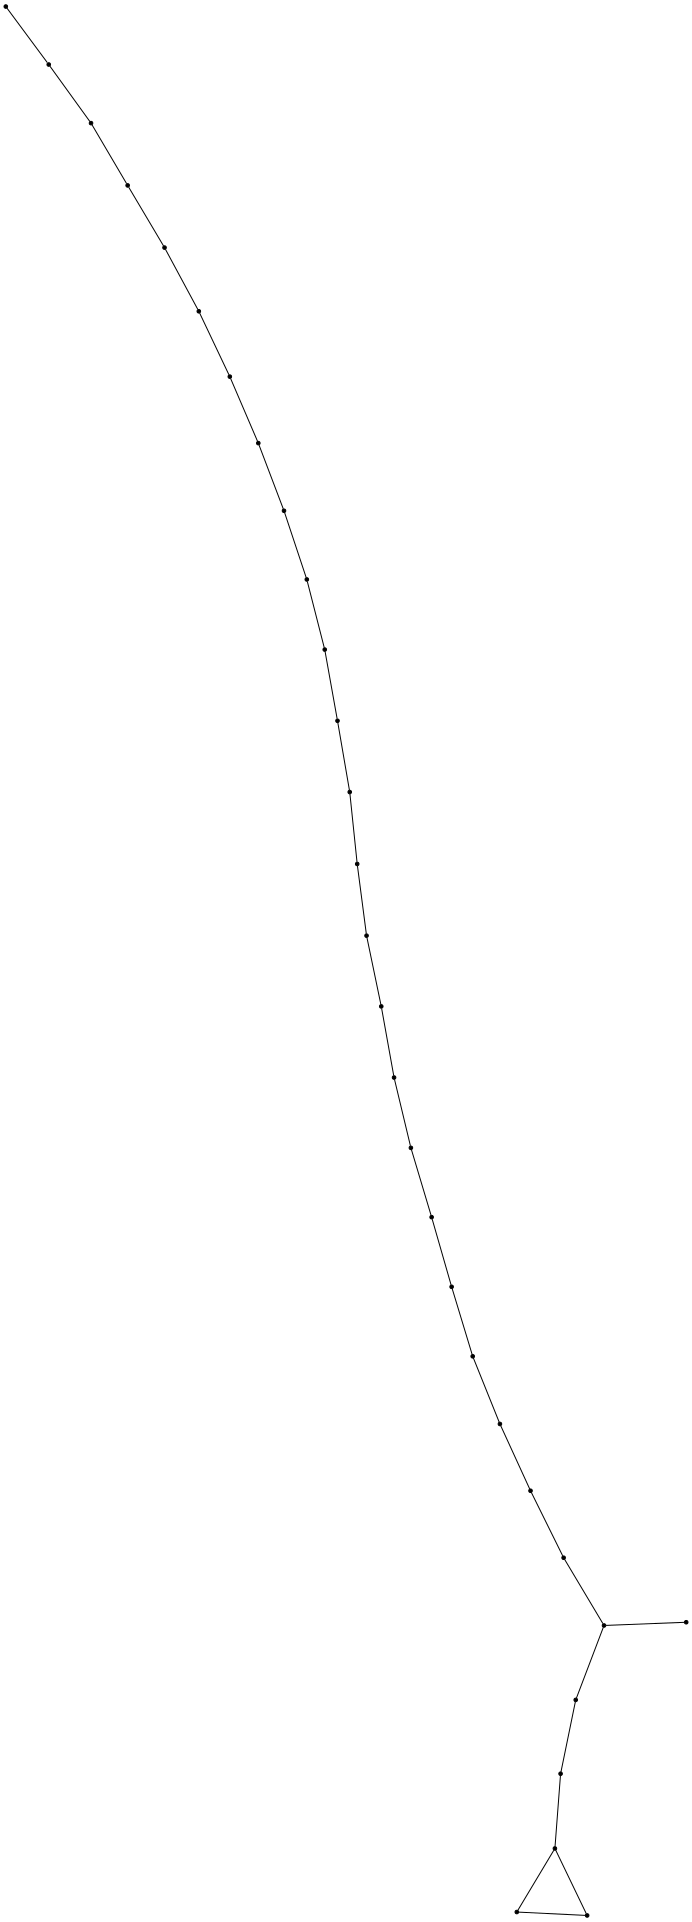

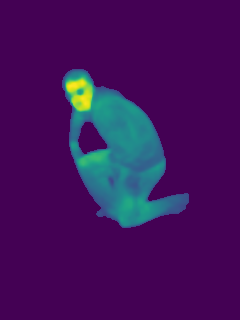

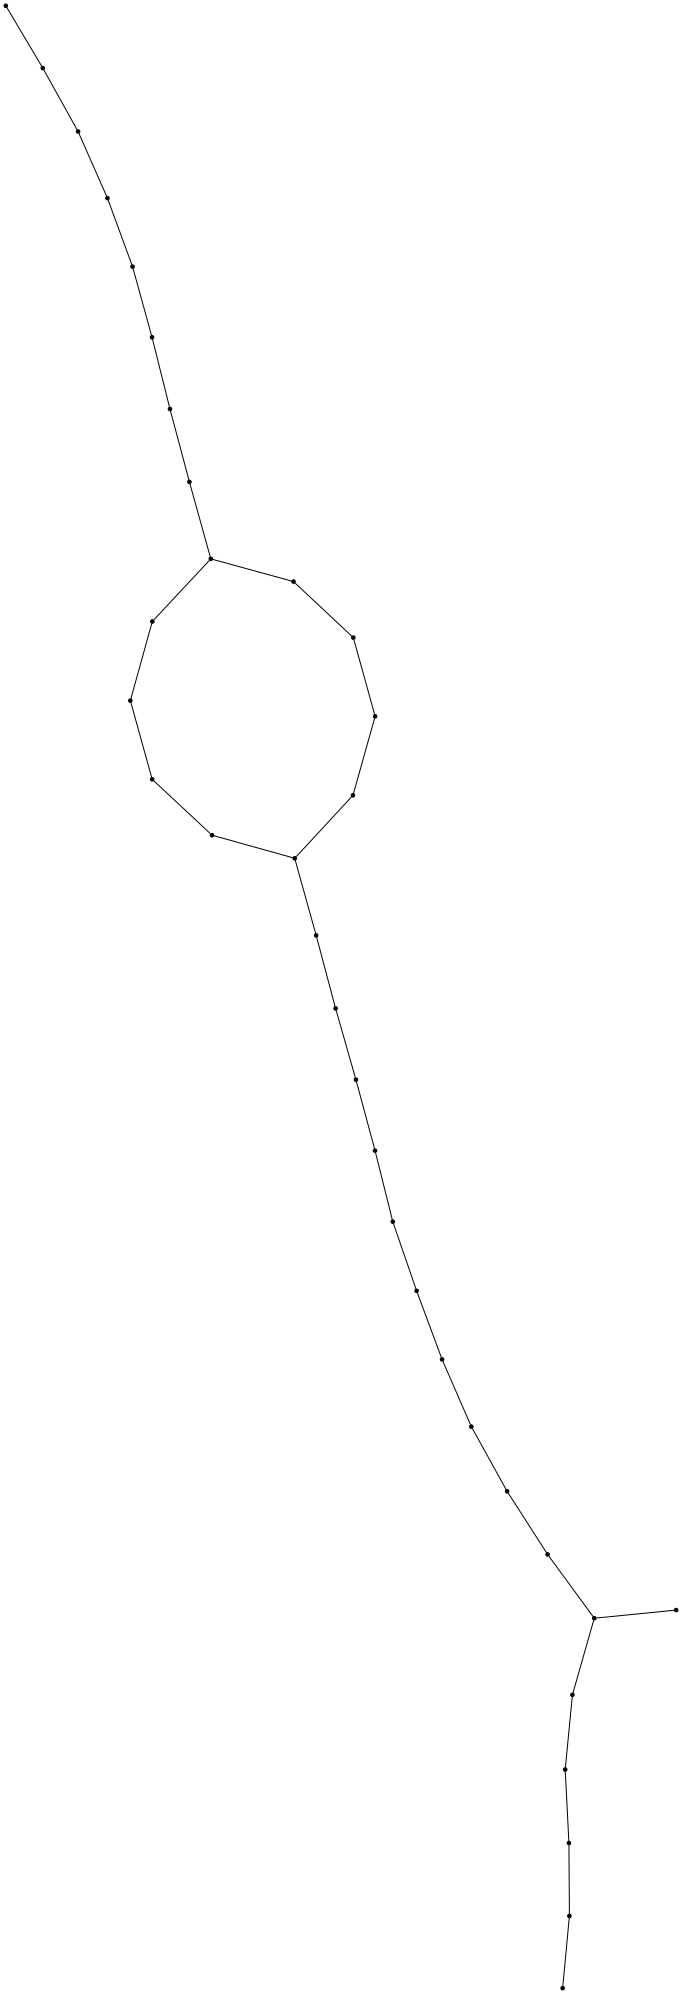

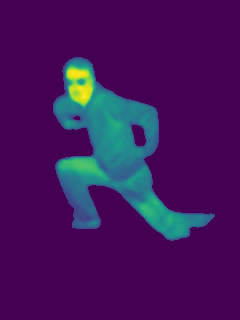

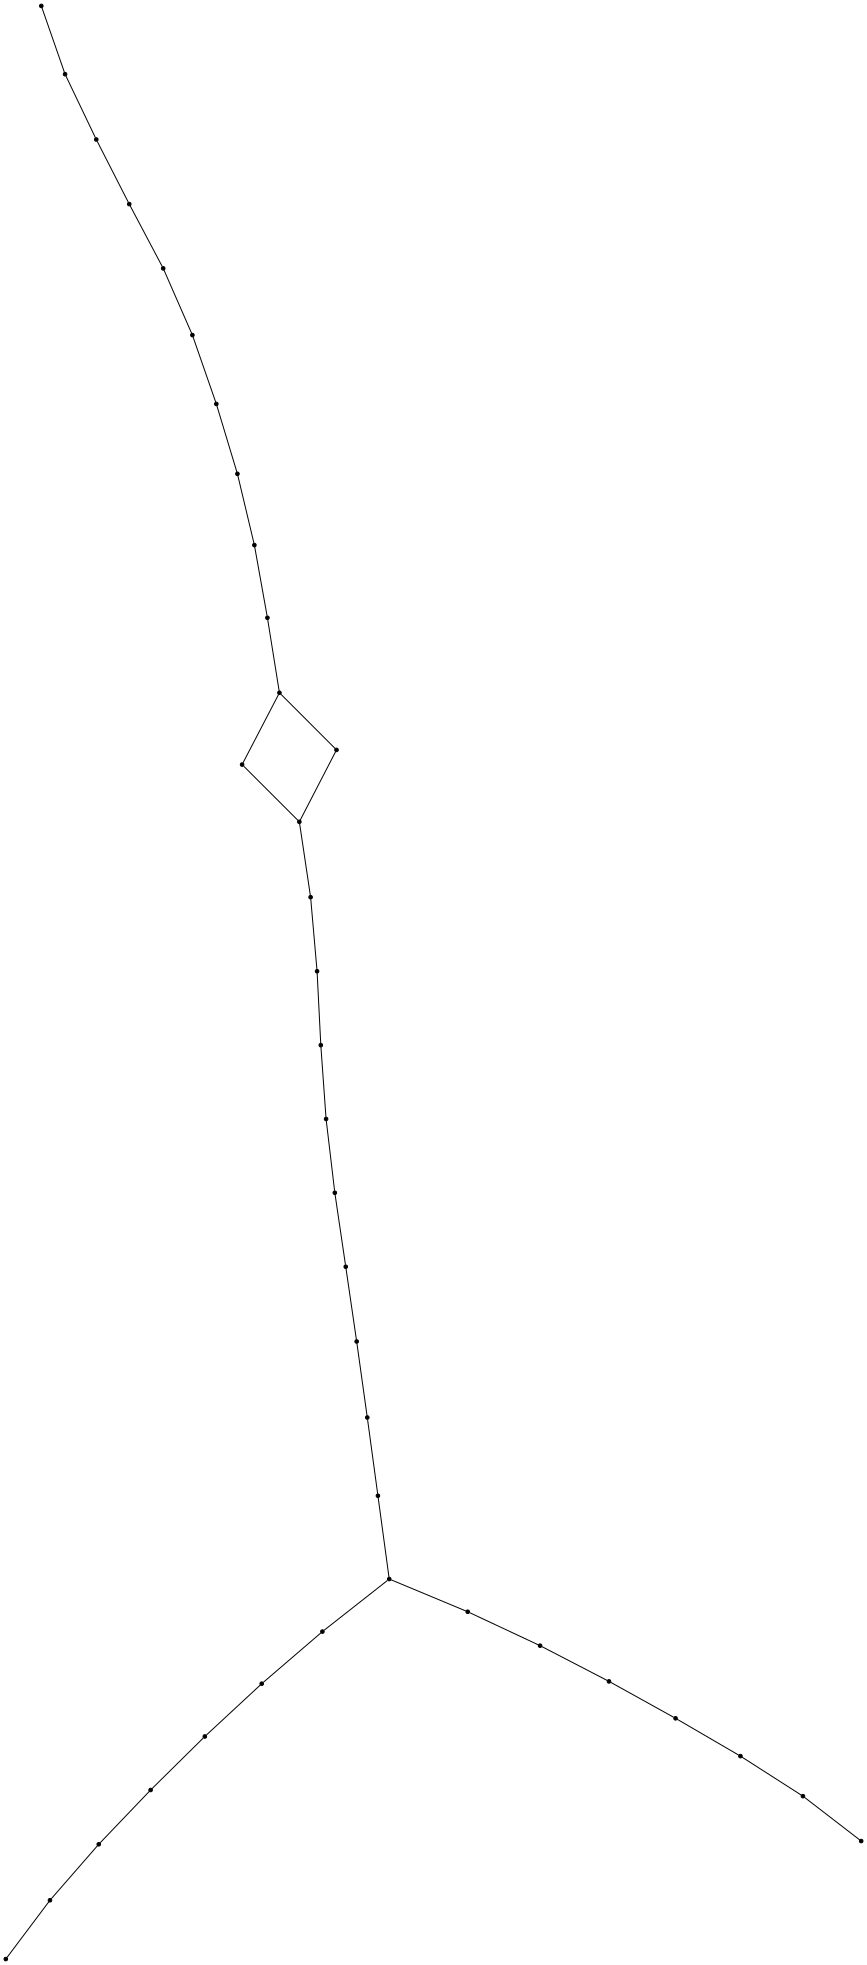

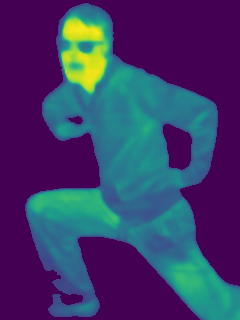

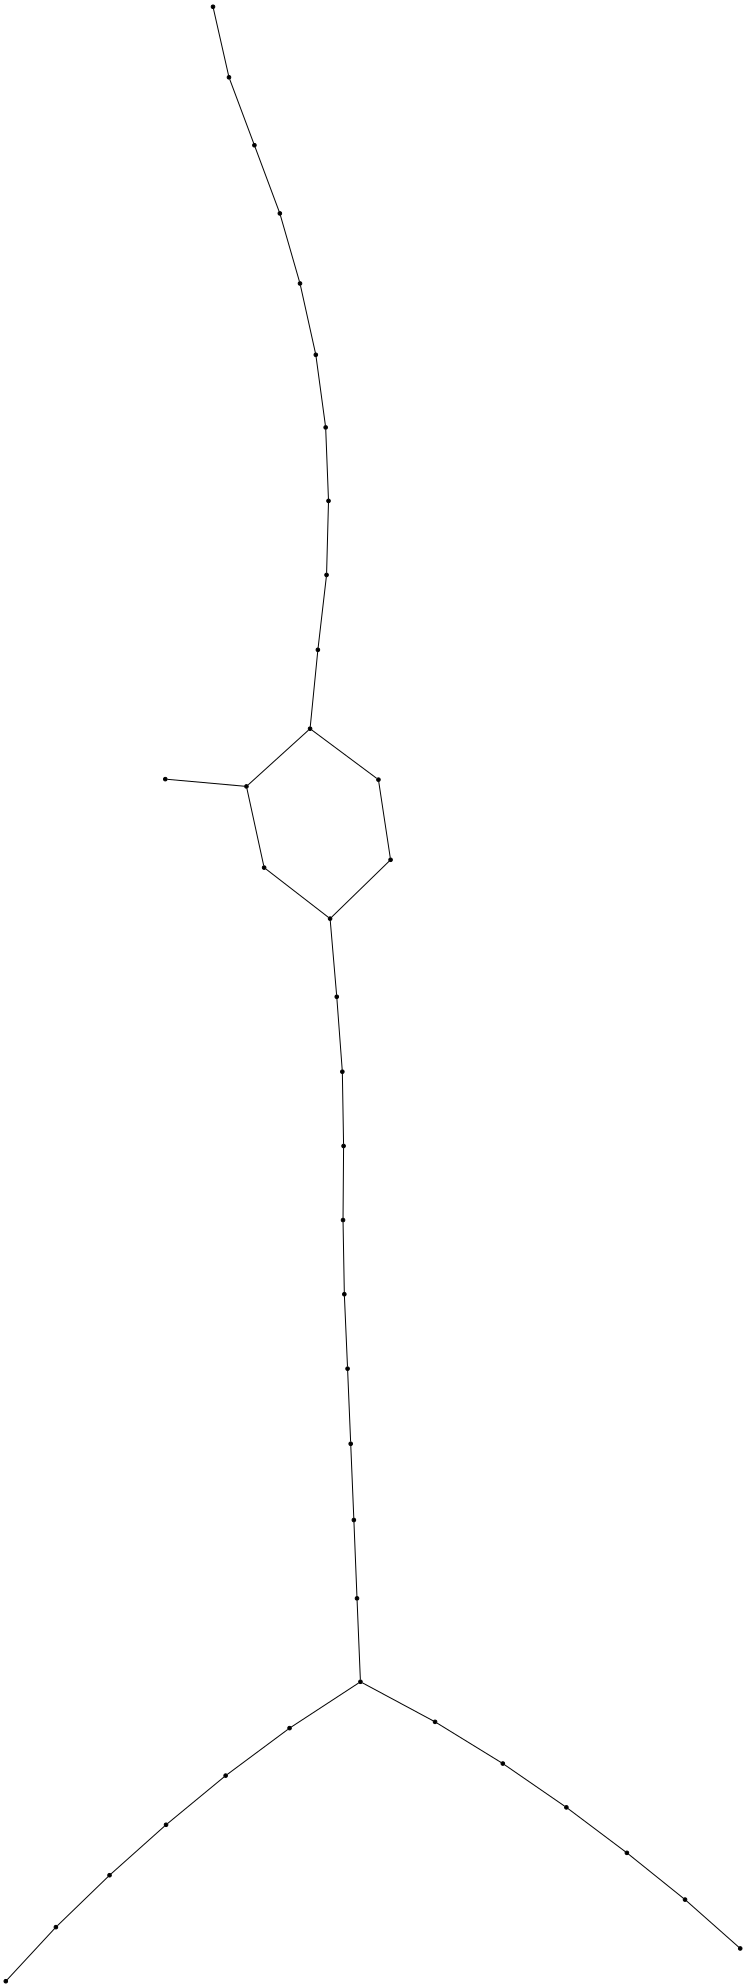

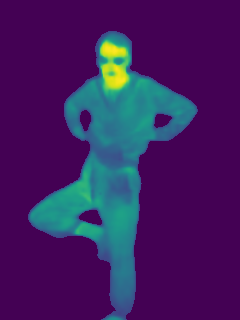

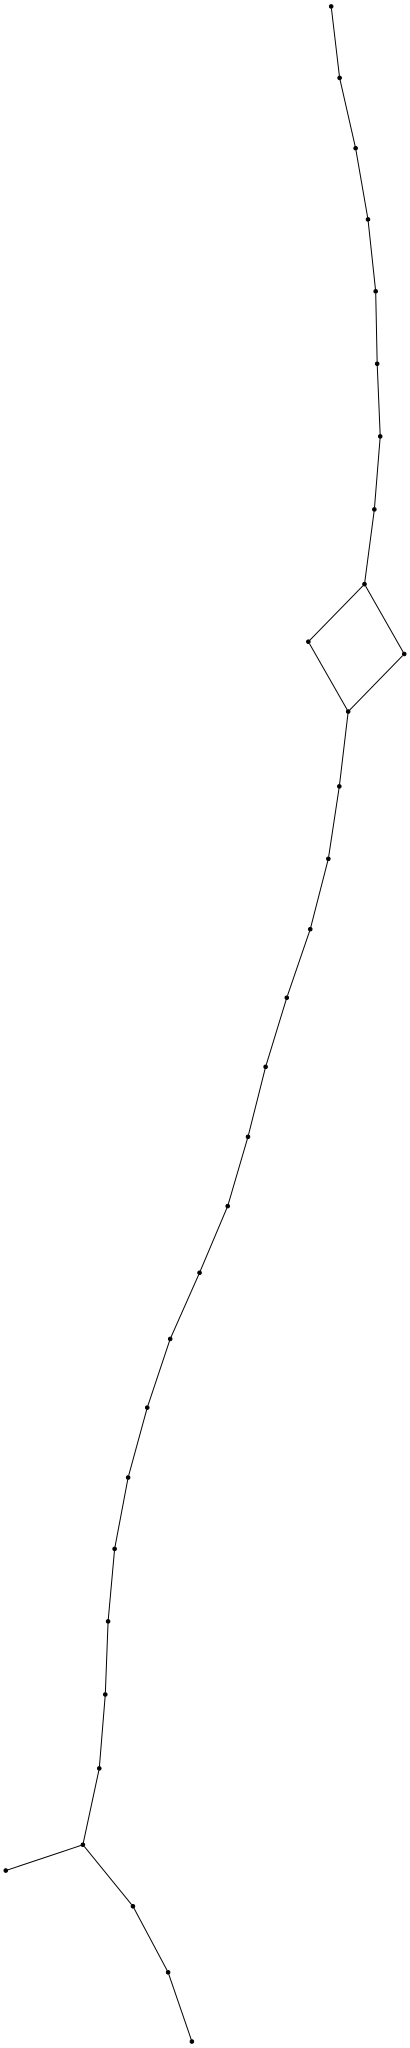

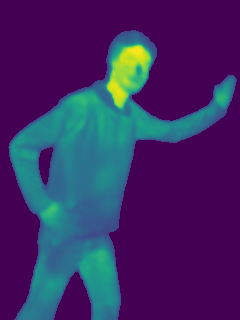

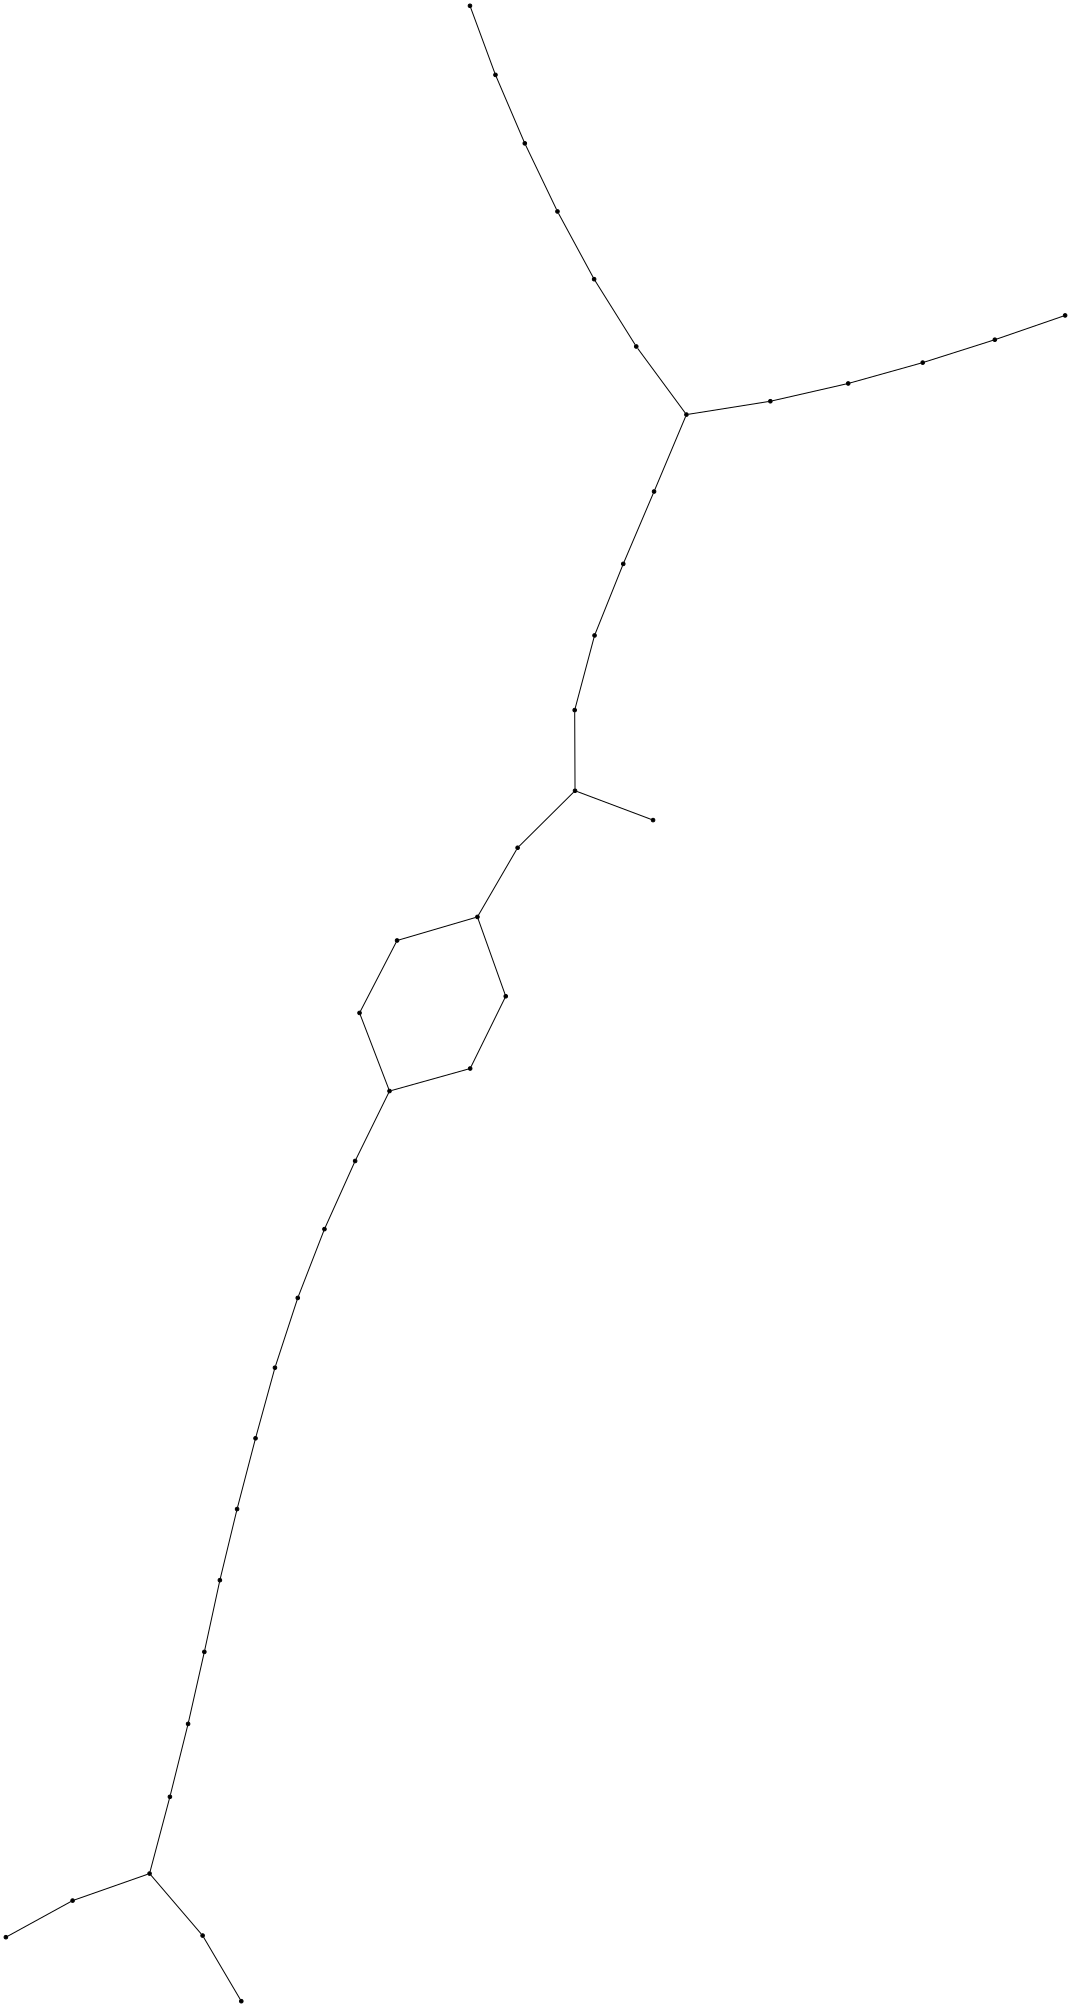

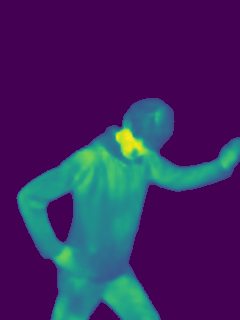

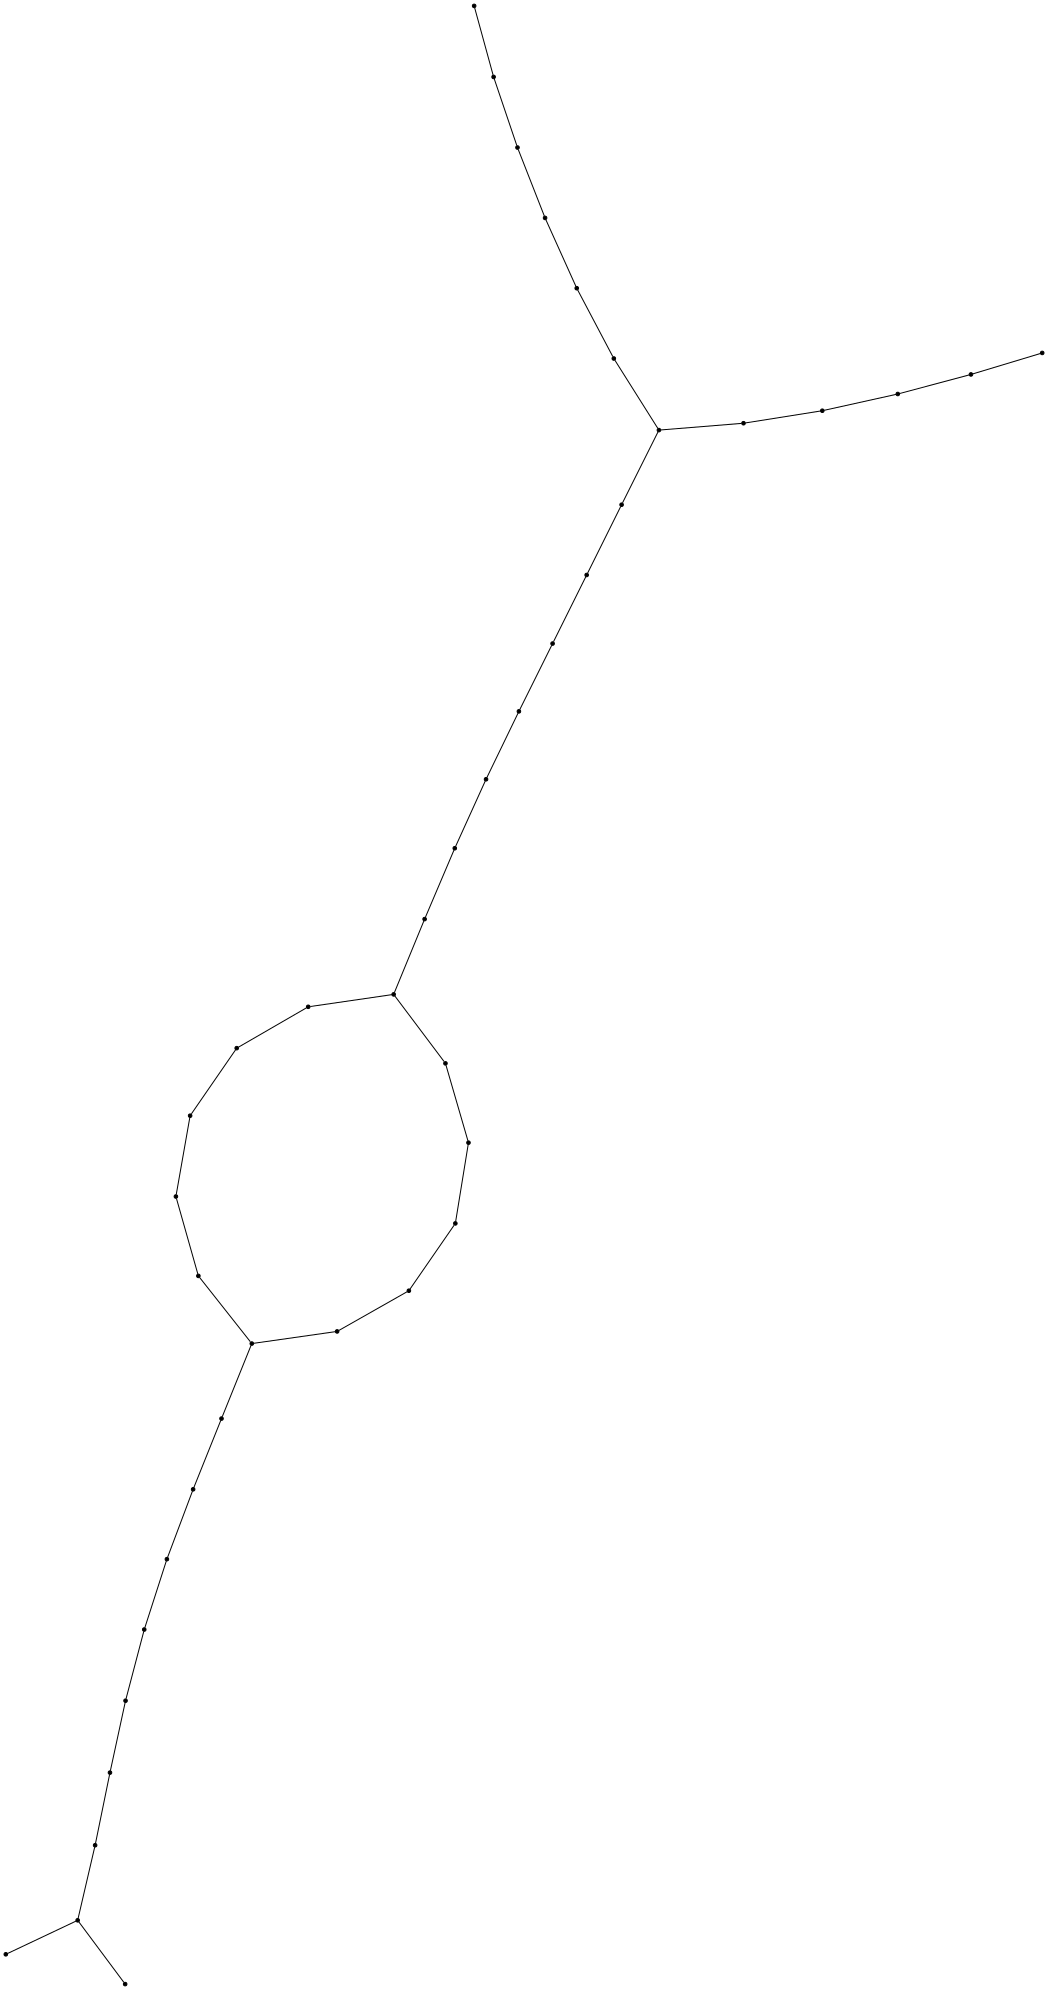

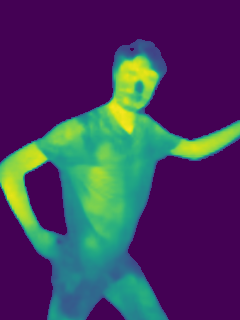

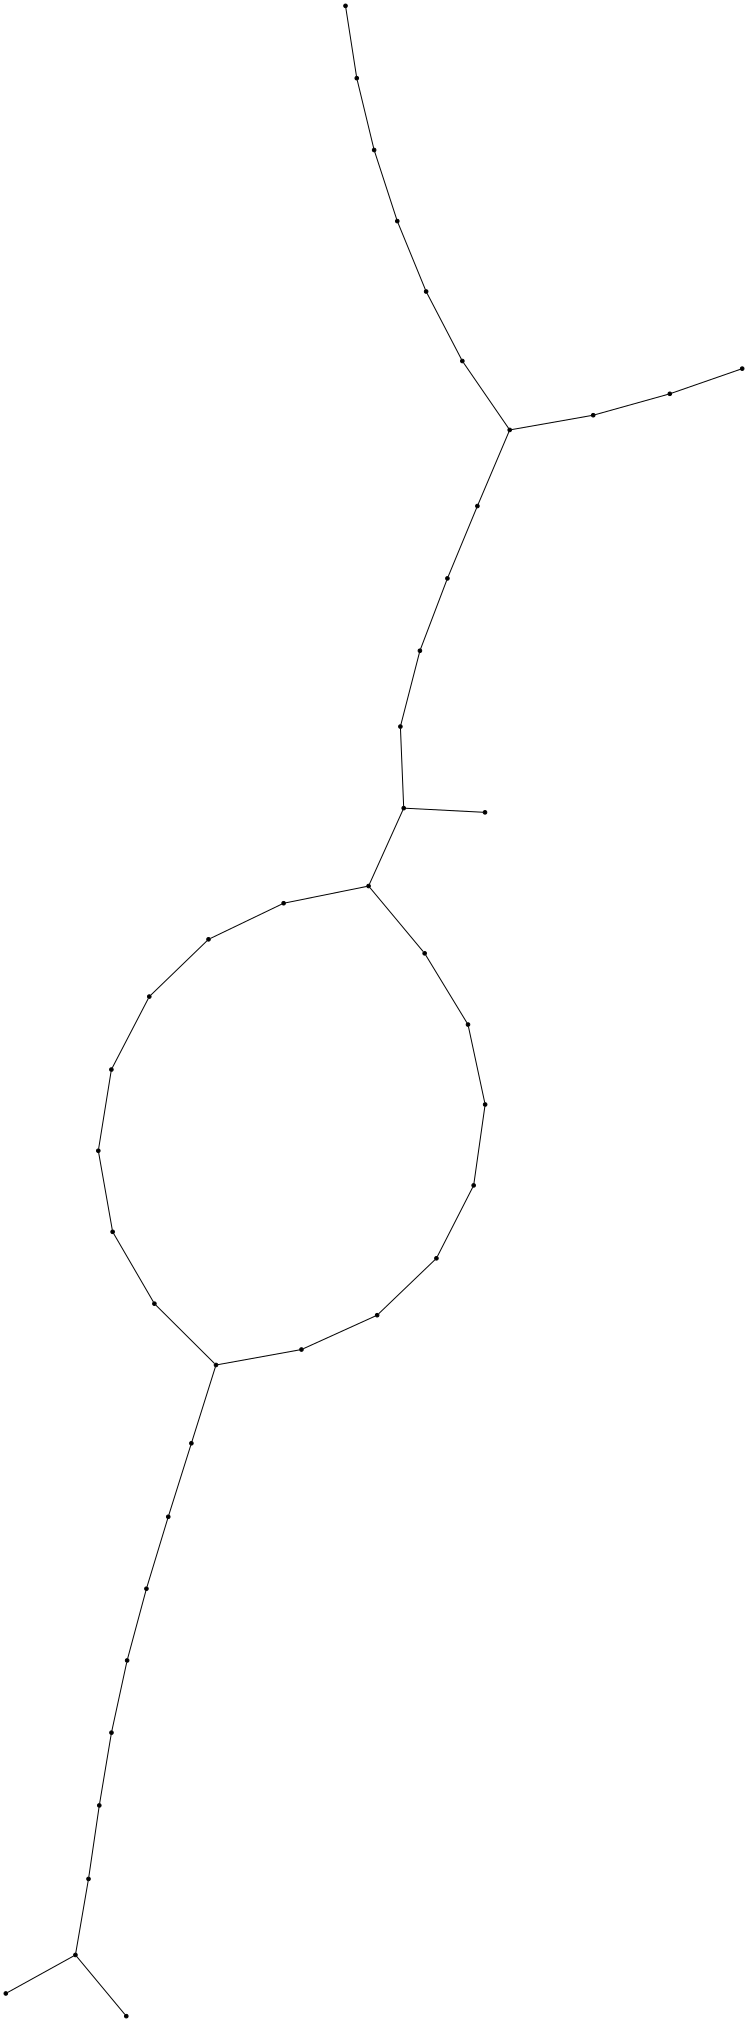

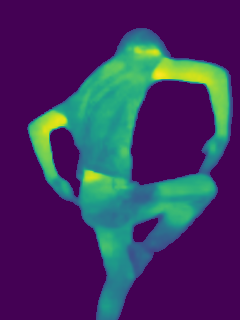

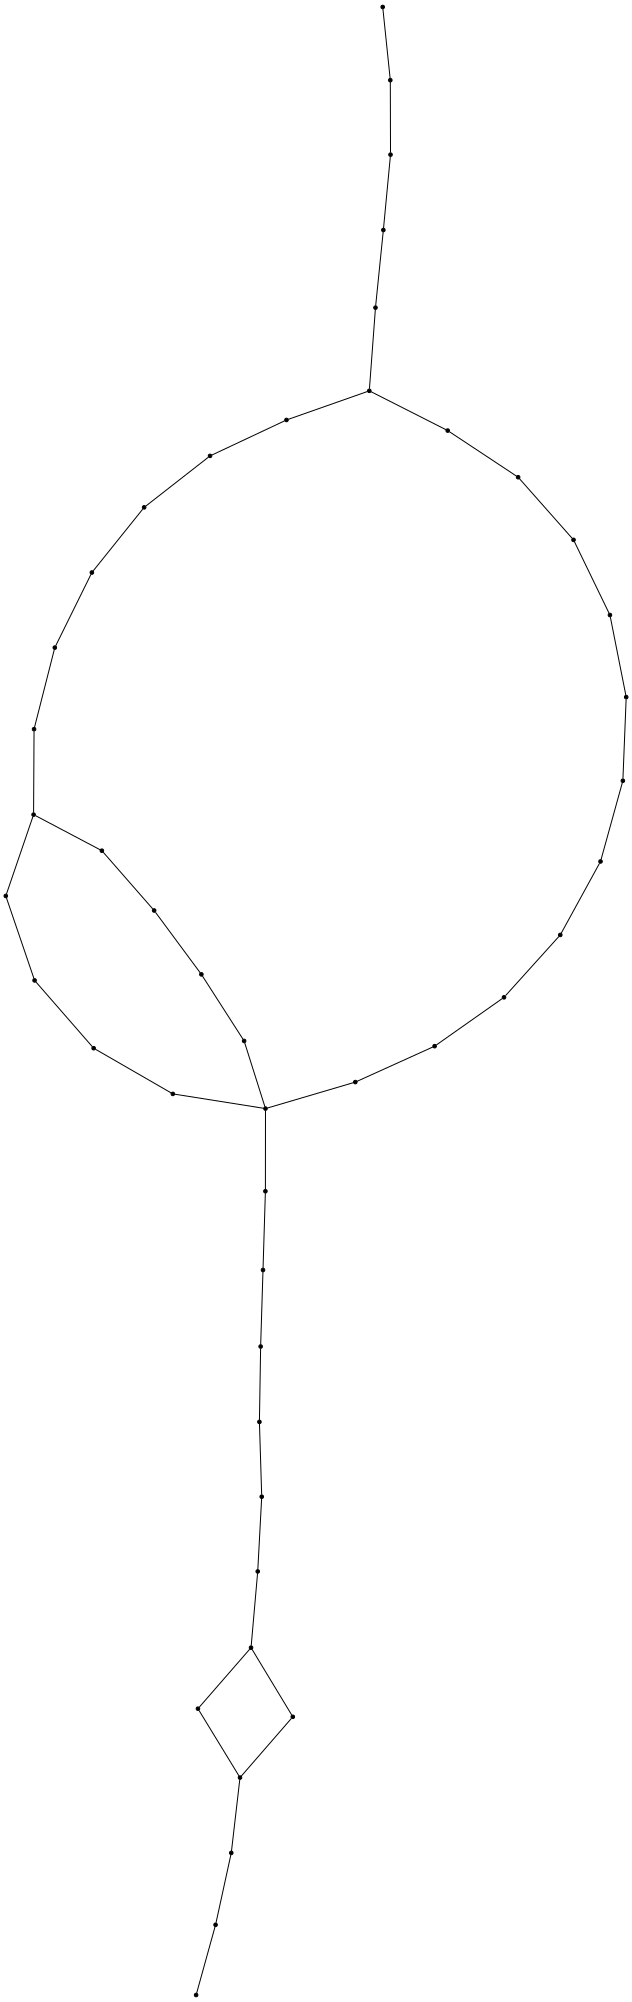

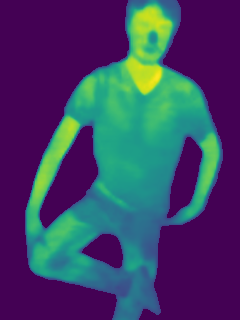

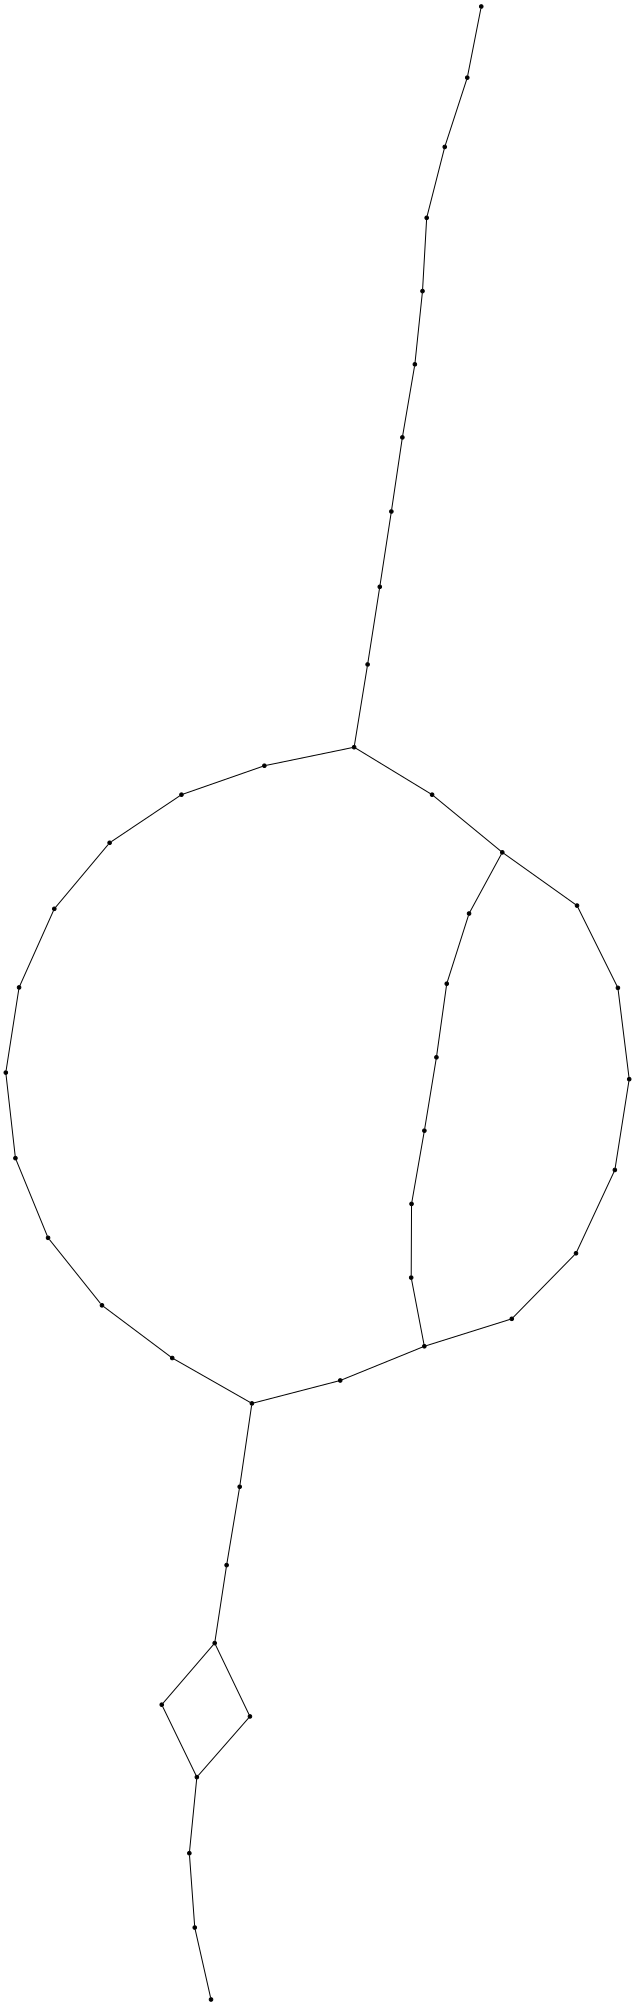

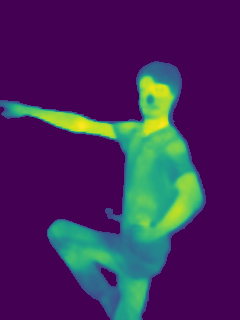

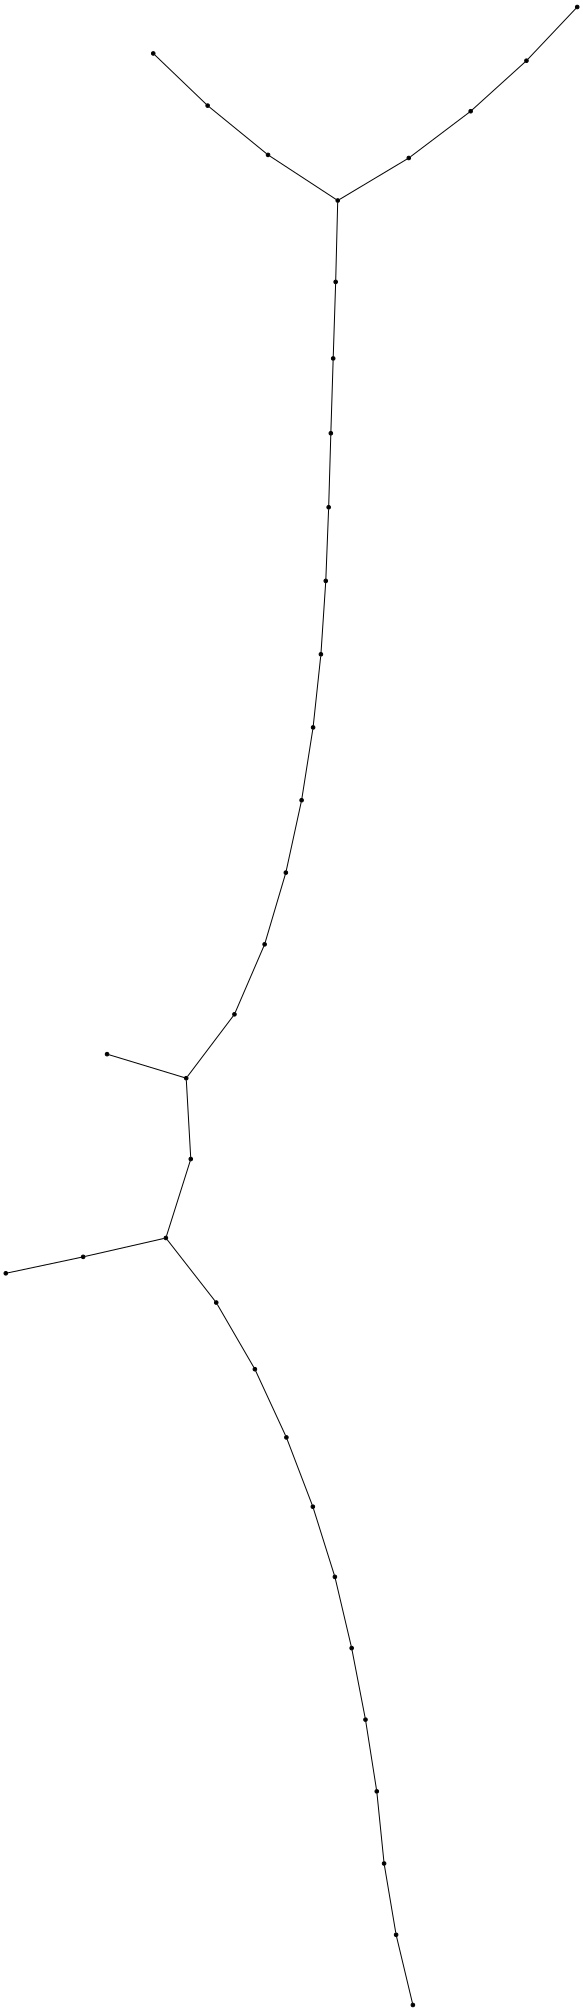

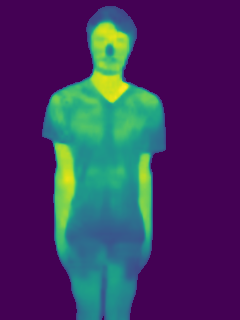

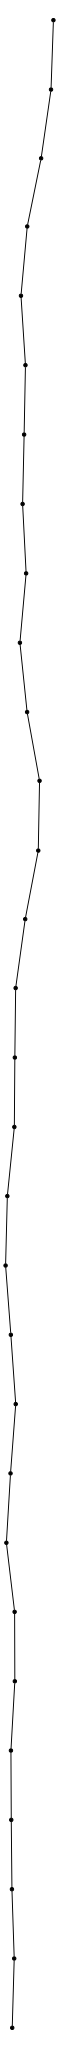

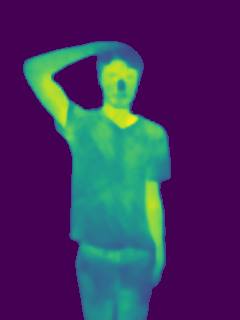

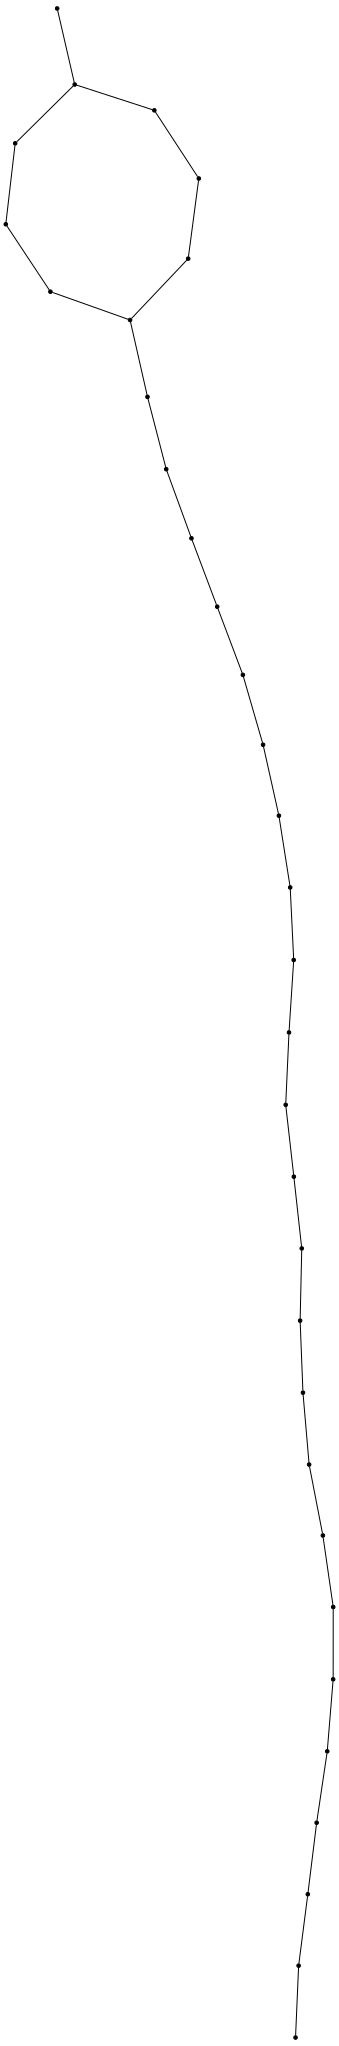

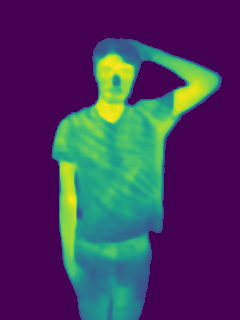

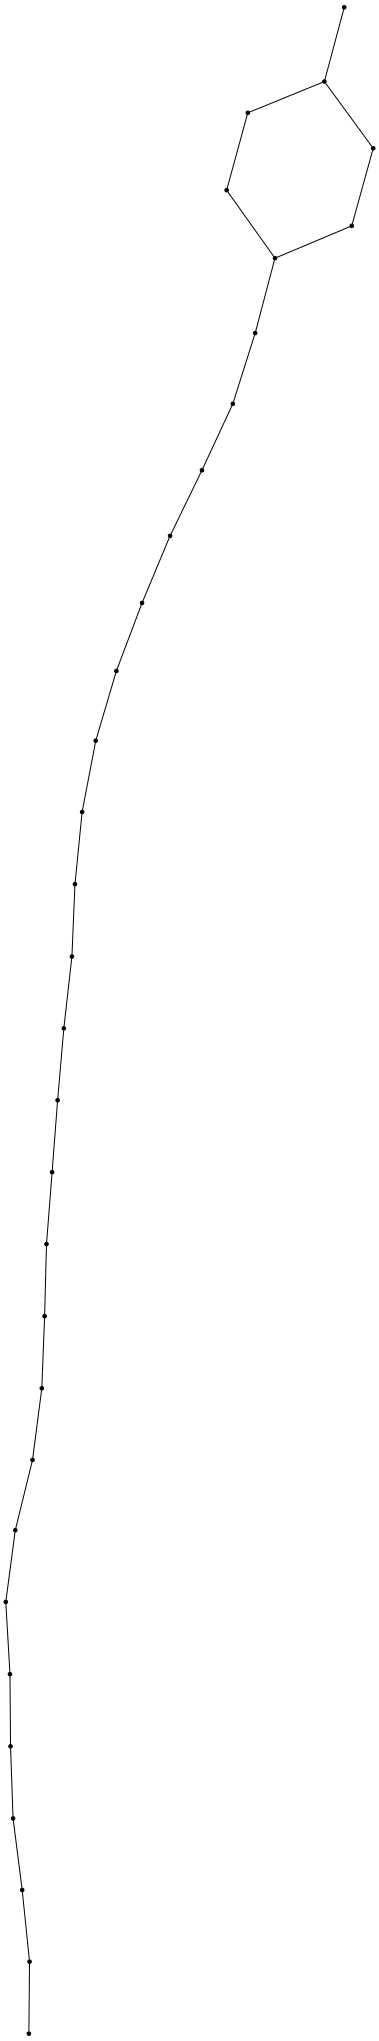

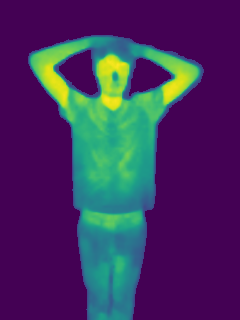

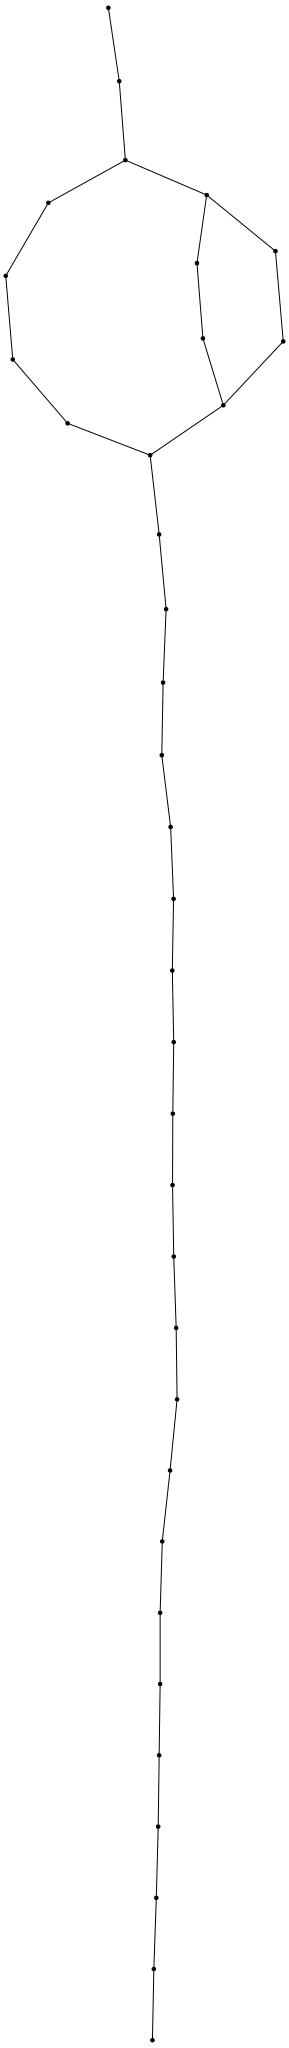

In [293]:
for file in glob("*JPG.png"):
    i = Image.open(file)
    flipped = np.array(i).astype("uint16").byteswap()
    flipped = flipped - flipped.min()
    flipped = flipped / flipped.max()
    flipped[flipped < .20] = 0

    hot_points = np.mgrid[tuple(slice(0, x) for x in flipped.shape)].transpose(1,2,0)[flipped > .20]


    cov = mapper.cover.balanced_cover_1d(30)
    flt = hot_points[:, 0].reshape(-1, 1).astype(np.float)
    pts = hot_points.astype(np.float)

    with Capturing() as output:
        mappered = mapper.mapper(pts, flt, cov, mapper.cutoff.histogram(30))

#     canvas = np.zeros((flipped.shape[0],flipped.shape[1],3), dtype=np.uint8)

#     for node in mappered.nodes:
#         color,  = cm.viridis(np.random.rand(1)) * 255
#         for x,y in hot_points[node.points]:
#             canvas[x, y, 0] = color[0]
#             canvas[x, y, 1] = color[1]
#             canvas[x, y, 2] = color[2]
    
    edges = list(mappered.simplices.simplices[1].keys())    
    nodes = set(e for edge in edges for e in edge)

#     did_something = True
#     while did_something:
#         did_something = False
#         nodes = set(e for edge in edges for e in edge)
#         for node in nodes:
#             matching_edges = [edge for edge in edges if node in edge]
#             if len(matching_edges) == 2:
#                 for edge in matching_edges:
#                     edges.remove(edge)

#                 a, b = set(e for edge in matching_edges for e in edge) - set([node])
#                 edges.append((a, b))
#                 did_something = True        
    
    g = graphviz.Graph(engine='neato')
    for a in nodes:
        x,y = (hot_points[mappered.nodes[a].points].mean(axis=0) / 70)
        g.node(str(a), label="", shape="point", pos="{},{}".format(y, -x))

    for (a, b) in edges:
        g.edge(str(a), str(b))
    
    display(Image.fromarray((cm.viridis(flipped) * 255).astype("uint8")))
    display(g)

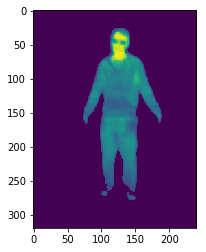

In [221]:
plt.imshow(flipped)

In [52]:
# http://stackoverflow.com/questions/16571150/how-to-capture-stdout-output-from-a-python-function-call

from io import StringIO
import sys

class Capturing(list):
    def __enter__(self):
        self._stdout = sys.stdout
        sys.stdout = self._stringio = StringIO()
        return self
    def __exit__(self, *args):
        self.extend(self._stringio.getvalue().splitlines())
        del self._stringio    # free up some memory
        sys.stdout = self._stdout

In [81]:
mappered

{'info': {'size_min': 19, 'size_max': 1336, 'filter_min': 100.0, 'filter_max': 319.0, 'filter_min_array': array([ 100.]), 'filter_max_array': array([ 319.]), 'cover': {'type': 'balanced_cover_1d', 'intervals': array([30]), 'fract_overlap': array([ 0.5]), 'str': 'Balanced cover with 30 intervals and 50.0% overlap.', 'mask': None, 'dim': 1, 'min': array([ 100.]), 'max': array([ 319.]), 'range': array([ 219.])}, 'cutoff': 'Histogram method with 20 bins', 'cluster': 'Single linkage clustering'}, 'levelsets': {(0,): levelset(array([ 100.]),array([ 130.]),{2}), (1,): levelset(array([ 118.]),array([ 140.]),{3, 4}), (2,): levelset(array([ 130.]),array([ 148.]),{0, 1}), (3,): levelset(array([ 140.]),array([ 154.]),{10, 11}), (4,): levelset(array([ 148.]),array([ 160.]),{8, 12}), (5,): levelset(array([ 154.]),array([ 165.]),{5, 7}), (6,): levelset(array([ 160.]),array([ 169.]),{9}), (7,): levelset(array([ 165.]),array([ 172.]),{6}), (8,): levelset(array([ 169.]),array([ 176.]),{13}), (9,): level

In [297]:
help(g._repr_svg_)

Help on method _repr_svg_ in module graphviz.files:

_repr_svg_() method of graphviz.dot.Graph instance

